## 匯入資料

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd   
df = pd.read_csv("E:\data\data.csv")
print(df.head())

   Height  Weight
0    1.47   52.21
1    1.50   53.12
2    1.52   54.48
3    1.55   55.84
4    1.57   57.20


Understanding the Data
FuelConsumption.csv:
We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source
MODELYEAR e.g. 2014
MAKE e.g. Acura
MODEL e.g. ILX
VEHICLE CLASS e.g. SUV
ENGINE SIZE e.g. 4.7
CYLINDERS e.g 6
TRANSMISSION e.g. A6
FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

## 檢查資料

In [18]:
print(df.isnull().values.sum())  #檢查整張DataFrame有幾個NaN
print("資料筆數:", df.shape)
print("資料的欄位名稱，分別是:", df.keys())
print("第一筆的資料內容:", df.iloc[0,::])
print("第一筆的預測目標:",df['Weight'][0])

0
資料筆數: (15, 2)
資料的欄位名稱，分別是: Index(['Height', 'Weight'], dtype='object')
第一筆的資料內容: Height     1.47
Weight    52.21
Name: 0, dtype: float64
第一筆的預測目標: 52.21


## 繪製身高與體重的關係圖

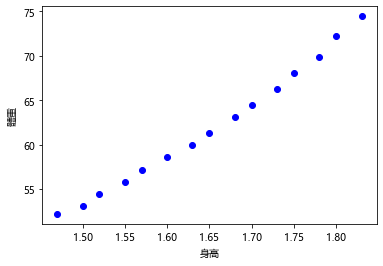

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.scatter(df.Height, df.Weight,  color='blue')
plt.xlabel("身高")
plt.ylabel("體重")
plt.show()

## 取資料表內數值資料進行線性回歸

In [20]:
X = df.drop('Weight', axis=1)
y = df['Weight']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
print("原始資料集的維度大小:", df.shape)
print("訓練集的維度大小:   ", train_X.shape)
print("測試集的維度大小:   ", test_X.shape)

原始資料集的維度大小: (15, 2)
訓練集的維度大小:    (12, 1)
測試集的維度大小:    (3, 1)


In [21]:
model = LinearRegression()  #使用線性回歸模型
model.fit(train_X, train_y)  #將訓練資料train_X與train_y放入
print ('Coefficients: ', model.coef_)
print ('Intercept: ',model.intercept_)

Coefficients:  [63.13171913]
Intercept:  -42.178608958837785


In [22]:
pred = model.predict(test_X) #將test_x輸入模型進行預測，儲存到pred
score = mean_squared_error(pred, test_y)  #比較模型預測結果pred與實際結果test_y的MSE
print("MSE:", score)

MSE: 1.0029930838678223


## 繪製身高與體重散布圖與線性迴歸分析圖

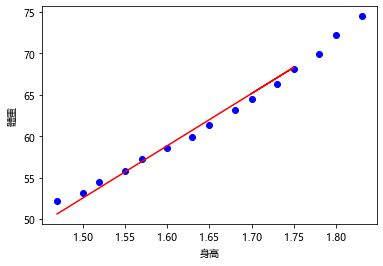

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.scatter(X, y,  color='blue')
plt.plot(test_X, pred, c="red")
plt.xlabel("身高")
plt.ylabel("體重")
plt.show()